# ML

## ML_Classifier
Dataset : PAMAP_features

In [17]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/yoojm/Gachon/2학년 1학기/인공지능개론_이명규/Dataset/PAMAP_features.csv", index_col=0)

# 데이터 확인
df

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,2,17,light,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,2,4,moderate,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,7,5,vigorous,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,7,17,light,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,8,3,light,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,6,2,light,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,3,2,light,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,6,4,moderate,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,2,7,moderate,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [21]:
df.columns

Index(['sub_id', 'activity_id', 'act_level', 'hr_mean', 'hr_mean_normal',
       'hr_std', 'hr_std_normal', 'hand_tmp_mean', 'hand_tmp_std',
       'hand_acc_x_mean', 'hand_acc_x_std', 'hand_acc_y_mean',
       'hand_acc_y_std', 'hand_acc_z_mean', 'hand_acc_z_std',
       'hand_gyr_x_mean', 'hand_gyr_x_std', 'hand_gyr_y_mean',
       'hand_gyr_y_std', 'hand_gyr_z_mean', 'hand_gyr_z_std', 'chest_tmp_mean',
       'chest_tmp_std', 'chest_acc_x_mean', 'chest_acc_x_std',
       'chest_acc_y_mean', 'chest_acc_y_std', 'chest_acc_z_mean',
       'chest_acc_z_std', 'chest_gyr_x_mean', 'chest_gyr_x_std',
       'chest_gyr_y_mean', 'chest_gyr_y_std', 'chest_gyr_z_mean',
       'chest_gyr_z_std', 'ankle_tmp_mean', 'ankle_tmp_std',
       'ankle_acc_x_mean', 'ankle_acc_x_std', 'ankle_acc_y_mean',
       'ankle_acc_y_std', 'ankle_acc_z_mean', 'ankle_acc_z_std',
       'ankle_gyr_x_mean', 'ankle_gyr_x_std', 'ankle_gyr_y_mean',
       'ankle_gyr_y_std', 'ankle_gyr_z_mean', 'ankle_gyr_z_std',
       '

Text(0.5, 1.0, 'Label')

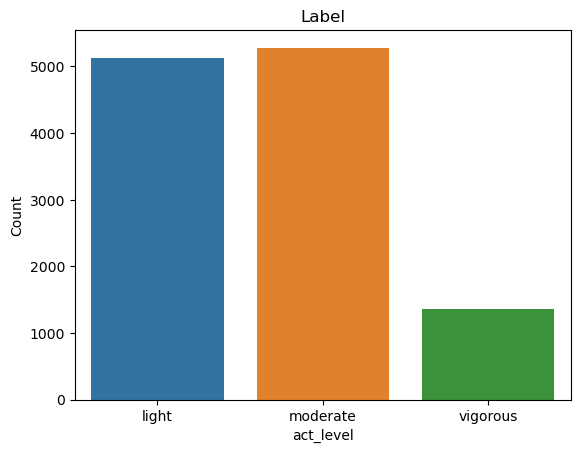

In [72]:
sns.countplot(data = df, x="act_level")
plt.xlabel("act_level")
plt.ylabel("Count")
plt.title("Label")

Text(0.5, 1.0, 'Label')

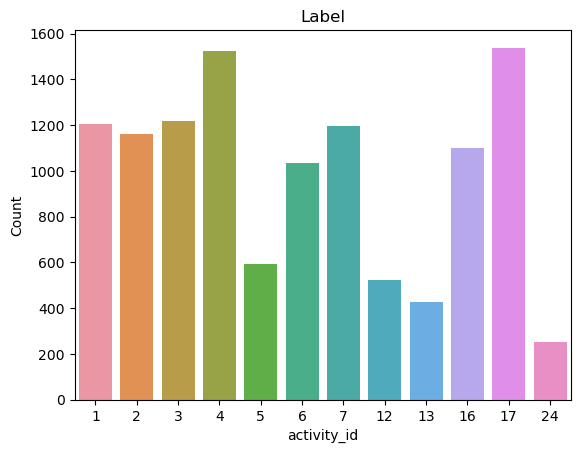

In [71]:
sns.countplot(data = df, x="activity_id")
plt.xlabel("activity_id")
plt.ylabel("Count")
plt.title("Label")

Text(0.5, 1.0, 'Label')

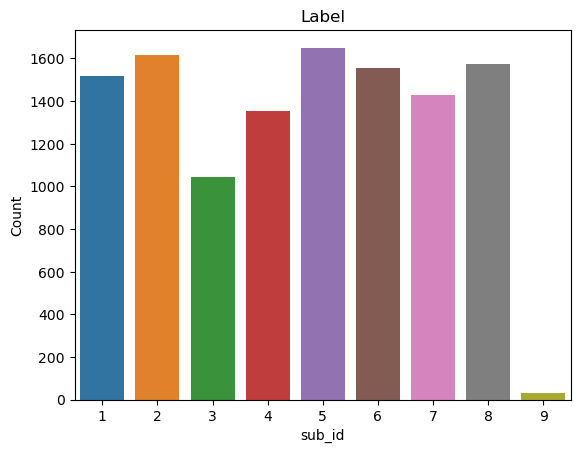

In [70]:
sns.countplot(data = df, x="sub_id")
plt.xlabel("sub_id")
plt.ylabel("Count")
plt.title("Label")

In [24]:
df['act_level'].value_counts()

act_level
moderate    5283
light       5124
vigorous    1366
Name: count, dtype: int64

In [40]:
df['activity_id'].value_counts()

activity_id
17    1539
4     1525
3     1220
1     1203
7     1196
2     1162
16    1099
6     1035
5      593
12     522
13     428
24     251
Name: count, dtype: int64

In [73]:
df['sub_id'].value_counts()

sub_id
5    1651
2    1618
8    1576
6    1556
1    1518
7    1430
4    1353
3    1042
9      29
Name: count, dtype: int64

In [74]:
df.isnull().sum()

sub_id              0
activity_id         0
act_level           0
hr_mean             0
hr_mean_normal      0
                   ..
chest_gyr_yz_cor    0
chest_gyr_xz_cor    0
ankle_gyr_xy_cor    0
ankle_gyr_yz_cor    0
ankle_gyr_xz_cor    0
Length: 67, dtype: int64

In [75]:
df = df.dropna()
df.isnull().sum()

sub_id              0
activity_id         0
act_level           0
hr_mean             0
hr_mean_normal      0
                   ..
chest_gyr_yz_cor    0
chest_gyr_xz_cor    0
ankle_gyr_xy_cor    0
ankle_gyr_yz_cor    0
ankle_gyr_xz_cor    0
Length: 67, dtype: int64

In [81]:
X=df.drop('activity_id',axis=1)
X=X.drop('sub_id', axis=1)
X=X.drop('act_level', axis=1)
X.head()

,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,87.000000,1.175676,0.000000,7.105427e-15,34.3750,0.0,-1.165524,2.383779,3.381285,2.582771,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,124.605469,1.683858,0.927920,1.253946e-02,31.8750,0.0,-12.040995,3.734766,3.069947,2.591651,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,113.493430,1.891557,2.315888,3.859813e-02,32.5000,0.0,-3.723040,10.188184,11.705779,17.220389,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,82.513672,1.375228,0.492657,8.210948e-03,33.8125,0.0,-3.618932,1.935690,0.542981,2.907890,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,73.000000,1.106061,0.000000,7.327472e-15,34.4375,0.0,-9.275877,0.082824,1.006239,0.153816,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685


In [82]:
y=df['act_level']
y.value_counts()

act_level
moderate    5283
light       5124
vigorous    1366
Name: count, dtype: int64

In [83]:
y.head()

3006        light
3497     moderate
14495    vigorous
13278       light
14969       light
Name: act_level, dtype: object

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [85]:
# Build a Logistic Regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9925271739130435
[[1245    5    0]
 [   6 1331    5]
 [   0    6  346]]


In [86]:
# Build a Decision Tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9891304347826086
[[1245    5    0]
 [  10 1325    7]
 [   0   10  342]]


In [87]:
# Build a RandomForest classifier and predict

clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)

pred_rf = clf_rf.predict(X_test)

print ("\n--- Random Forest ---")
print (accuracy_score(y_test, pred_rf))
print (confusion_matrix(y_test, pred_rf))


--- Random Forest ---
0.9972826086956522
[[1250    0    0]
 [   4 1338    0]
 [   0    4  348]]
